We need to use Python Package module - PIP to install the packages for our classification problem. Following lines will install the necessary packages

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install xgboost

**Importing packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import sklearn.metrics as met
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

**Importing data**

In [3]:
data_orig=pd.read_csv('UCI_Credit_Card.csv')
data=data_orig.copy()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Data Insights**

In [4]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


We can see all features count to be 30000 and hence there are no null values

In [5]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Function to find the percnetage of specific discrete column in the provided data

In [6]:
def class_percent(data, target_var):
  value=data.loc[:,target_var].value_counts(ascending=False).reset_index()['index']
  i=0
  for x in data.loc[:,target_var].value_counts():
    print(value[i] , round((x/data.count()[0])*100,2),'%')
    i+=1
class_percent(data, 'default.payment.next.month')

0 77.88 %
1 22.12 %


In [7]:
class_percent(data, 'SEX')

2 60.37 %
1 39.63 %


In [8]:
data.drop('ID',axis=1,inplace=True)

**Exploratory data analysis**

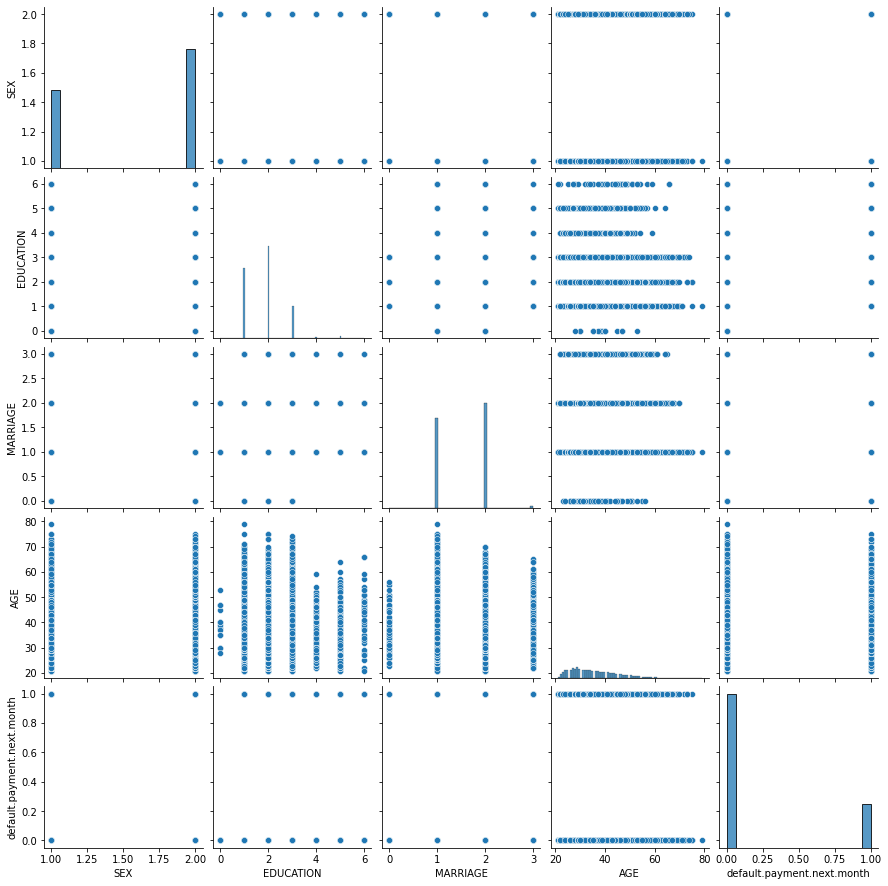

In [9]:
sns.pairplot(data[['SEX','EDUCATION','MARRIAGE','AGE','default.payment.next.month']])

1. By observing the last row of plot, we can say that defaulters are present in educated male and female of different ages irrespective of martial status.
2. Hence, we can say that SEX, EDUCATION, MARRIAGE and AGE plays a small factor in determining credit card defaulters.
3. We can check correlation to support our observation.

In [10]:
data[['SEX','EDUCATION','MARRIAGE','AGE','default.payment.next.month']].corr()

,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
SEX,1.000000,0.014232,-0.031389,-0.090874,-0.039961
EDUCATION,0.014232,1.000000,-0.143464,0.175061,0.028006
MARRIAGE,-0.031389,-0.143464,1.000000,-0.414170,-0.024339
AGE,-0.090874,0.175061,-0.414170,1.000000,0.013890
default.payment.next.month,-0.039961,0.028006,-0.024339,0.013890,1.000000


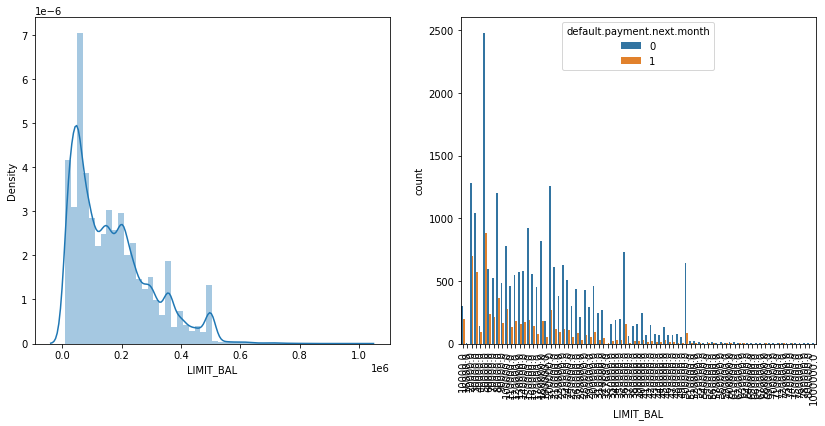

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64


In [11]:
data['LIMIT_BAL'].value_counts()
fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,2,1)
sns.distplot(data['LIMIT_BAL'],ax=ax,kde=True)
ax=fig.add_subplot(1,2,2)
sns.countplot(data=data,x='LIMIT_BAL',hue='default.payment.next.month')
plt.xticks(rotation=90)
# plt.locator_params(axis='x', nbins=30)
plt.show()
print(data['LIMIT_BAL'].value_counts().head())

1. We can see limit balance of TWD 50000 has highest number of customers
3. We can see more defaulters in range of TWD 10000 to 300000

2    14349
1     9015
Name: SEX, dtype: int64


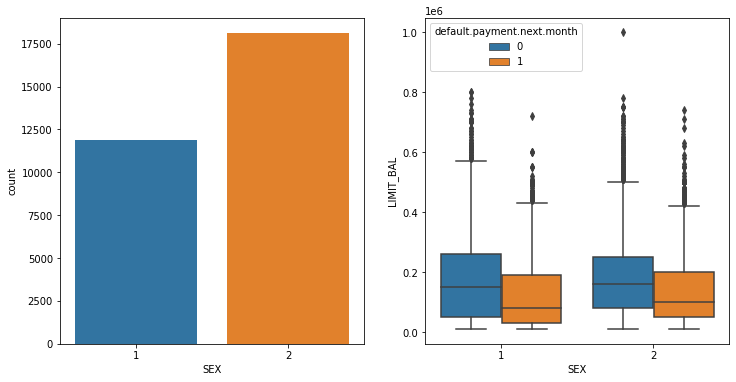

In [12]:
data['SEX'].value_counts()
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,2,1)
sns.countplot(data['SEX'])
ax=fig.add_subplot(1,2,2)
sns.boxplot(x='SEX',y='LIMIT_BAL',hue='default.payment.next.month',data=data)
print(data.loc[data['default.payment.next.month']==0]['SEX'].value_counts())

1. We can see more women are using credit card than men
2. Defaulters are more in both men and women. Hence, checking percentage of defaulters for male and female data

In [13]:
print("Male percentage")
class_percent(data[data['SEX'] == 1],'default.payment.next.month')
print("Female percentage")
class_percent(data[data['SEX'] == 2],'default.payment.next.month')

Male percentage
0 75.83 %
1 24.17 %
Female percentage
0 79.22 %
1 20.78 %


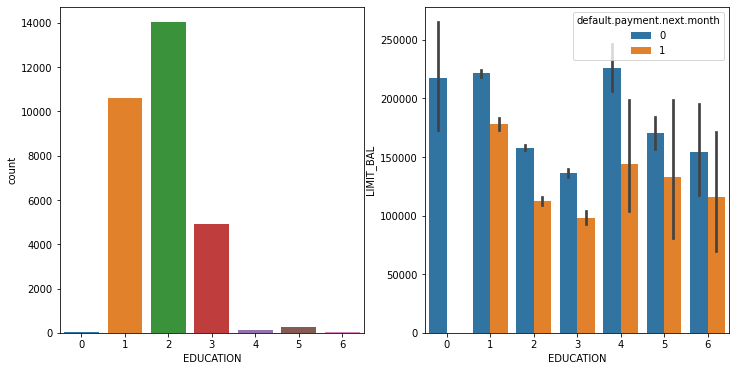

In [14]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,2,1)
sns.countplot(data['EDUCATION'])
ax=fig.add_subplot(1,2,2)
sns.barplot(y='LIMIT_BAL',x='EDUCATION',hue='default.payment.next.month',data=data)

1. Most Credit card holders are customers having school or university graduates
2. All type of educated people are defaulters and so we csan check percentage of defaulters (1) and non-defaulters (0)

In [15]:
print("Education 0 (unknown)")
class_percent(data[data['EDUCATION']==0],'default.payment.next.month')
print("Education 1 (graduate school)")
class_percent(data[(data['EDUCATION']==1)],'default.payment.next.month')
print("Education 2 (university)")
class_percent(data[(data['EDUCATION']==2)],'default.payment.next.month')
print("Education 3 (high school)")
class_percent(data[(data['EDUCATION']==3)],'default.payment.next.month')
print("Education 4 (others)")
class_percent(data[(data['EDUCATION']==4)],'default.payment.next.month')
print("Education 5 (unknown)")
class_percent(data[(data['EDUCATION']==5)],'default.payment.next.month')
print("Education 6 (unknown)")
class_percent(data[(data['EDUCATION']==6)],'default.payment.next.month')

Education 0 (unknown)
0 100.0 %
Education 1 (graduate school)
0 80.77 %
1 19.23 %
Education 2 (university)
0 76.27 %
1 23.73 %
Education 3 (high school)
0 74.84 %
1 25.16 %
Education 4 (others)
0 94.31 %
1 5.69 %
Education 5 (unknown)
0 93.57 %
1 6.43 %
Education 6 (unknown)
0 84.31 %
1 15.69 %


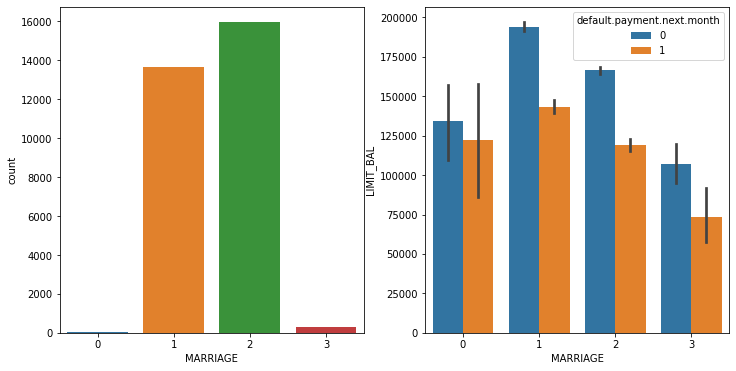

In [16]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,2,1)
sns.countplot(data['MARRIAGE'])
ax=fig.add_subplot(1,2,2)
sns.barplot(x='MARRIAGE',y='LIMIT_BAL',hue='default.payment.next.month',data=data)

1. We have more credit card customers of married/single people than other people
2. Married/Single people are defaulters of mean amount ranging from TWD 115000 to TWD 140000

In [17]:
print("Marriage 0 (unknown)")
class_percent(data[data['MARRIAGE'] == 0],'default.payment.next.month')
print("Marriage 1 (Married)")
class_percent(data[data['MARRIAGE'] == 1],'default.payment.next.month')
print("Marriage 2 (Single)")
class_percent(data[data['MARRIAGE'] == 2],'default.payment.next.month')
print("Marriage 3 (Others)")
class_percent(data[data['MARRIAGE'] == 3],'default.payment.next.month')

Marriage 0 (unknown)
0 90.74 %
1 9.26 %
Marriage 1 (Married)
0 76.53 %
1 23.47 %
Marriage 2 (Single)
0 79.07 %
1 20.93 %
Marriage 3 (Others)
0 73.99 %
1 26.01 %


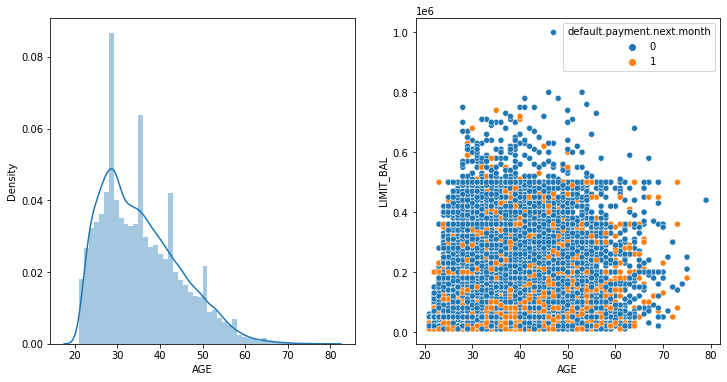

In [18]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,2,1)
sns.distplot(data['AGE'])
ax=fig.add_subplot(1,2,2)
sns.scatterplot(x='AGE',y='LIMIT_BAL',hue='default.payment.next.month',data=data)

1. We can see that people around 30 to 45 years of age was using more credit card
2. Defaulters are dispersed over various age groups. Hence, we can check percentage for age less than 45 and above 45 years

In [19]:
print("Age less than 45 years")
class_percent(data[data['AGE'] < 45],'default.payment.next.month')
print("Age above 45 years")
class_percent(data[data['AGE'] >= 45],'default.payment.next.month')

Age less than 45 years
0 78.38 %
1 21.62 %
Age above 45 years
0 75.52 %
1 24.48 %


Function to split and scale data for given input dataset and returns scaled data

In [20]:
def data_split_scale(x,y,scaler,test_split,random_state=0):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_split,random_state=random_state)
  sc=scaler
  x_train=sc.fit_transform(x_train)
  x_test=sc.transform(x_test)
  return x_train,x_test,y_train,y_test

In [21]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=data_split_scale(x,y,StandardScaler(),0.2,10)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(24000, 23) (6000, 23)
(24000,) (6000,)


Function that gets data, model as input and prints model metrics and returns trained model

In [22]:
def model_train(x_train,y_train,model_name,model,x_test,cv=0,data_score=False,y_test=None):
  mod=model
  mod=mod.fit(x_train,y_train)
  y_pred=mod.predict(x_test)
  y_pred_prob=mod.predict_proba(x_test)
  if(cv!=0):
    score=cross_validate(mod,x_train,y_train,cv=cv,scoring="accuracy",return_train_score=True)
    print(f"{model_name} validation training score is {score['train_score'].mean():.4}")
    print(f"{model_name} validation test score is {score['test_score'].mean():.4}")
  if(data_score):
    print(f"{model_name} training score is {mod.score(x_train,y_train):.4}")
    print(f"{model_name} test score is {mod.score(x_test,y_test):.4}")
  print(f"{model_name} accuracy score is {met.accuracy_score(y_test,y_pred):.4}",)
  print(f"{model_name} Precision score is {met.precision_score(y_test,y_pred):.4}")
  print(f"{model_name} F1 score is {met.f1_score(y_test,y_pred):.4}")
  print(f"{model_name} AUROC score is {met.roc_auc_score(y_test,y_pred_prob[:,1]):.4}")
  print(f"{model_name} Confusion matrix is \n{met.confusion_matrix(y_test,y_pred)}")
  return mod

Logistic validation training score is 0.8098
Logistic validation test score is 0.8096
Logistic training score is 0.81
Logistic test score is 0.8128
Logistic accuracy score is 0.8128
Logistic Precision score is 0.7266
Logistic F1 score is 0.3564
Logistic AUROC score is 0.7204
Logistic Confusion matrix is 
[[4566  117]
 [1006  311]]
[[-0.09283652 -0.05670752 -0.07017031 -0.08327956  0.07000881  0.63961688
   0.10727977  0.09669574  0.01593758  0.03262844  0.0210321  -0.42275518
   0.22640279  0.06110635  0.0498452  -0.04774589  0.03717736 -0.24273058
  -0.19383014 -0.06073614 -0.06991752 -0.04683363 -0.02178118]] [-1.46450192]


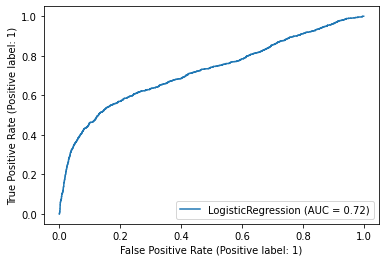

In [23]:
from sklearn.linear_model import LogisticRegression
log_classify = model_train(x_train,y_train,'Logistic',LogisticRegression(),x_test,10,True,y_test)
met.plot_roc_curve(log_classify,x_test,y_test)
print(log_classify.coef_,log_classify.intercept_)

In [24]:
cols = np.exp(log_classify.coef_[0])
pd.DataFrame(cols, 
             data.iloc[:,:-1].columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
PAY_0,1.895754
BILL_AMT2,1.254081
PAY_2,1.113246
PAY_3,1.101525
AGE,1.072518
BILL_AMT3,1.063012
BILL_AMT4,1.051108
BILL_AMT6,1.037877
PAY_5,1.033167
PAY_6,1.021255


Decision Tree validation training score is 0.824
Decision Tree validation test score is 0.8171
Decision Tree training score is 0.8236
Decision Tree test score is 0.8248
Decision Tree accuracy score is 0.8248
Decision Tree Precision score is 0.7065
Decision Tree F1 score is 0.464
Decision Tree AUROC score is 0.7544
Decision Tree Confusion matrix is 
[[4494  189]
 [ 862  455]]
[('LIMIT_BAL', 0.03196096093562591), ('SEX', 0.002061153456387237), ('EDUCATION', 0.00826041482852381), ('MARRIAGE', 0.00195257949762439), ('AGE', 0.0), ('PAY_0', 0.6841668143006028), ('PAY_2', 0.13948531828760247), ('PAY_3', 0.02944002637874899), ('PAY_4', 0.0), ('PAY_5', 0.006282741513058198), ('PAY_6', 0.01473224792990501), ('BILL_AMT1', 0.016277029622914396), ('BILL_AMT2', 0.0027289873510196053), ('BILL_AMT3', 0.0021788222098088816), ('BILL_AMT4', 0.0), ('BILL_AMT5', 0.0015860419378596966), ('BILL_AMT6', 0.0), ('PAY_AMT1', 0.0), ('PAY_AMT2', 0.0025938614802875513), ('PAY_AMT3', 0.0490651041656158), ('PAY_AMT4',

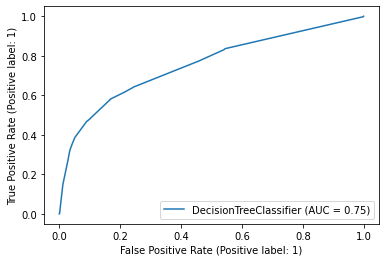

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_classify=model_train(x_train,y_train,'Decision Tree',DecisionTreeClassifier(max_depth=5),x_test,5,True,y_test)
met.plot_roc_curve(dt_classify,x_test,y_test)
print(list(zip(data.iloc[:,:-1].columns.tolist(),dt_classify.feature_importances_)))

Random Forest validation training score is 0.8172
Random Forest validation test score is 0.8132
Random Forest training score is 0.8153
Random Forest test score is 0.817
Random Forest accuracy score is 0.817
Random Forest Precision score is 0.698
Random Forest F1 score is 0.4128
Random Forest AUROC score is 0.7849
Random Forest Confusion matrix is 
[[4516  167]
 [ 931  386]]
[('LIMIT_BAL', 0.02474964106793572), ('SEX', 0.0004408445851216595), ('EDUCATION', 0.0014562238713292555), ('MARRIAGE', 0.001031178741319568), ('AGE', 0.003027901578912259), ('PAY_0', 0.30480371337690976), ('PAY_2', 0.20263447705922108), ('PAY_3', 0.0964850229445028), ('PAY_4', 0.10329330678816687), ('PAY_5', 0.05936125879282263), ('PAY_6', 0.04387307069433489), ('BILL_AMT1', 0.012564631974561183), ('BILL_AMT2', 0.01053082484371843), ('BILL_AMT3', 0.00722876832276877), ('BILL_AMT4', 0.006865197133213323), ('BILL_AMT5', 0.008034209857427211), ('BILL_AMT6', 0.005564718044353705), ('PAY_AMT1', 0.043464974488369446), ('

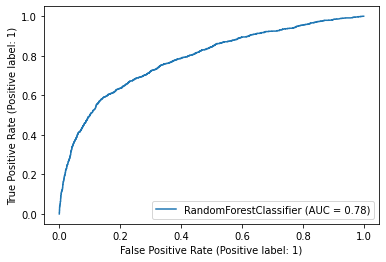

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classify = model_train(x_train,y_train,'Random Forest',RandomForestClassifier(n_estimators=100,max_depth=5),x_test,5,True,y_test)
met.plot_roc_curve(rf_classify,x_test,y_test)
print(list(zip(data.iloc[:,:-1].columns.tolist(),rf_classify.feature_importances_)))

XG Boost validation training score is 0.8257
XG Boost validation test score is 0.8197
XG Boost training score is 0.8244
XG Boost test score is 0.8263
XG Boost accuracy score is 0.8263
XG Boost Precision score is 0.7068
XG Boost F1 score is 0.4743
XG Boost AUROC score is 0.7765
XG Boost Confusion matrix is 
[[4488  195]
 [ 847  470]]
[('LIMIT_BAL', 0.011241243), ('SEX', 0.0044515794), ('EDUCATION', 0.0074695307), ('MARRIAGE', 0.004270644), ('AGE', 0.005036827), ('PAY_0', 0.5944759), ('PAY_2', 0.18753952), ('PAY_3', 0.030757086), ('PAY_4', 0.021380726), ('PAY_5', 0.015140866), ('PAY_6', 0.013709413), ('BILL_AMT1', 0.013292072), ('BILL_AMT2', 0.003955971), ('BILL_AMT3', 0.004831243), ('BILL_AMT4', 0.0040815375), ('BILL_AMT5', 0.0037138746), ('BILL_AMT6', 0.0034250368), ('PAY_AMT1', 0.01087555), ('PAY_AMT2', 0.016229475), ('PAY_AMT3', 0.024949092), ('PAY_AMT4', 0.0084740715), ('PAY_AMT5', 0.0043612397), ('PAY_AMT6', 0.0063375146)]


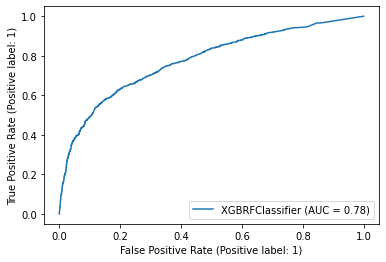

In [27]:
from xgboost import XGBRFClassifier
xgb_classify=model_train(x_train,y_train,'XG Boost',XGBRFClassifier(n_estimators=100,max_depth=5),x_test,5,True,y_test)
met.plot_roc_curve(xgb_classify,x_test,y_test)
print(list(zip(data.iloc[:,:-1].columns.tolist(),xgb_classify.feature_importances_)))

**Oversampling/Undersampling technique**

As we know that defaulters data are lesser in quantity which could affect the predictability of models. Hence, we are going to apply oversampling and undersampling techniques to add more data in attempt to increase the predictability of models

In [28]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(sampling_strategy="all")
x_smotek,y_stomet=smt.fit_resample(x,y)

In [29]:
# pd.concat([x_st,y_st],axis=1)
class_percent(pd.concat([x_smotek,y_stomet],axis=1),'default.payment.next.month')

1 50.0 %
0 50.0 %


After applying oversampling and undersampling techniques on data, we are able to get data with equal percentage to train model

In [30]:
x_train,x_test,y_train,y_test=data_split_scale(x_smotek,y_stomet,StandardScaler(),0.2,10)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(36337, 23) (9085, 23)
(36337,) (9085,)


Logistic validation training score is 0.7231
Logistic validation test score is 0.7229
Logistic training score is 0.7233
Logistic test score is 0.719
Logistic accuracy score is 0.719
Logistic Precision score is 0.7153
Logistic F1 score is 0.7179
Logistic AUROC score is 0.7922
Logistic Confusion matrix is 
[[3283 1293]
 [1260 3249]]
[[-0.20066724 -0.41076068 -0.41200265 -0.57349905 -0.09413299  0.64580958
   0.0896758   0.02037287  0.0689252   0.04778741  0.01826825 -0.43619574
   0.22576143  0.18480717 -0.03959297 -0.03450633  0.06946405 -0.22011415
  -0.27456682 -0.07873043 -0.08274602 -0.08306671 -0.06225231]] [-0.01288289]


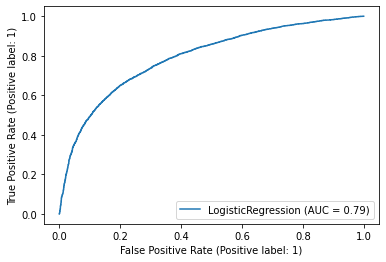

In [31]:
log_classify=model_train(x_train,y_train,'Logistic',LogisticRegression(),x_test,10,True,y_test)
met.plot_roc_curve(log_classify,x_test,y_test)
print(log_classify.coef_,log_classify.intercept_)

In [32]:
cols = np.exp(log_classify.coef_[0])
pd.DataFrame(cols, 
             data.iloc[:,:-1].columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
PAY_0,1.907531
BILL_AMT2,1.253277
BILL_AMT3,1.202986
PAY_2,1.093820
BILL_AMT6,1.071934
PAY_4,1.071356
PAY_5,1.048948
PAY_3,1.020582
PAY_6,1.018436
BILL_AMT5,0.966082


Decision Tree validation training score is 0.7368
Decision Tree validation test score is 0.7309
Decision Tree training score is 0.7371
Decision Tree test score is 0.7259
Decision Tree accuracy score is 0.7259
Decision Tree Precision score is 0.7303
Decision Tree F1 score is 0.72
Decision Tree AUROC score is 0.787
Decision Tree Confusion matrix is 
[[3394 1182]
 [1308 3201]]
[('LIMIT_BAL', 0.015571061394437452), ('SEX', 0.10555525077281978), ('EDUCATION', 0.0283112766808316), ('MARRIAGE', 0.11821058401242361), ('AGE', 0.0), ('PAY_0', 0.4556443926669804), ('PAY_2', 0.14346820784900313), ('PAY_3', 0.0), ('PAY_4', 0.0), ('PAY_5', 0.0), ('PAY_6', 0.003357002433069504), ('BILL_AMT1', 0.0), ('BILL_AMT2', 0.0), ('BILL_AMT3', 0.0), ('BILL_AMT4', 0.0), ('BILL_AMT5', 0.012770188085906615), ('BILL_AMT6', 0.0), ('PAY_AMT1', 0.0541871722821634), ('PAY_AMT2', 0.03860670760879796), ('PAY_AMT3', 0.0243181562135665), ('PAY_AMT4', 0.0), ('PAY_AMT5', 0.0), ('PAY_AMT6', 0.0)]


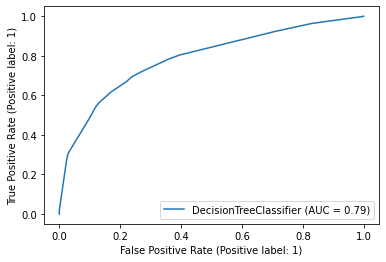

In [33]:
dt_classify=model_train(x_train,y_train,'Decision Tree',DecisionTreeClassifier(max_depth=5),x_test,5,True,y_test)
met.plot_roc_curve(dt_classify,x_test,y_test)
print(list(zip(data.iloc[:,:-1].columns.tolist(),dt_classify.feature_importances_)))

XG Boost validation training score is 0.7477
XG Boost validation test score is 0.7424
XG Boost training score is 0.7487
XG Boost test score is 0.7401
XG Boost accuracy score is 0.7401
XG Boost Precision score is 0.7676
XG Boost F1 score is 0.723
XG Boost AUROC score is 0.8058
XG Boost Confusion matrix is 
[[3643  933]
 [1428 3081]]
[('LIMIT_BAL', 0.018021435), ('SEX', 0.071233995), ('EDUCATION', 0.02700996), ('MARRIAGE', 0.117014736), ('AGE', 0.02548244), ('PAY_0', 0.2715637), ('PAY_2', 0.117374375), ('PAY_3', 0.063166976), ('PAY_4', 0.016287697), ('PAY_5', 0.01716096), ('PAY_6', 0.017748326), ('BILL_AMT1', 0.016249659), ('BILL_AMT2', 0.0048773214), ('BILL_AMT3', 0.0049574533), ('BILL_AMT4', 0.005601562), ('BILL_AMT5', 0.024063876), ('BILL_AMT6', 0.0052175587), ('PAY_AMT1', 0.05120998), ('PAY_AMT2', 0.03624234), ('PAY_AMT3', 0.04894362), ('PAY_AMT4', 0.024902003), ('PAY_AMT5', 0.010712939), ('PAY_AMT6', 0.004956966)]


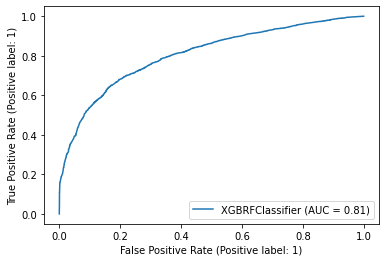

In [34]:
xgb_classify=model_train(x_train,y_train,'XG Boost',XGBRFClassifier(n_estimators=100,max_depth=5),x_test,5,True,y_test)
met.plot_roc_curve(xgb_classify,x_test,y_test)
print(list(zip(data.iloc[:,:-1].columns.tolist(),xgb_classify.feature_importances_)))

Random Forest validation training score is 0.754
Random Forest validation test score is 0.7501
Random Forest training score is 0.7547
Random Forest test score is 0.7519
Random Forest accuracy score is 0.7519
Random Forest Precision score is 0.7954
Random Forest F1 score is 0.7293
Random Forest AUROC score is 0.8194
Random Forest Confusion matrix is 
[[3795  781]
 [1473 3036]]
[('LIMIT_BAL', 0.033893102306177605), ('SEX', 0.06658488680712621), ('EDUCATION', 0.014038178766605167), ('MARRIAGE', 0.07826385412411231), ('AGE', 0.0014796576847595044), ('PAY_0', 0.19103246426487341), ('PAY_2', 0.19669465394760416), ('PAY_3', 0.07184647899621821), ('PAY_4', 0.07717120420923465), ('PAY_5', 0.03557931330572575), ('PAY_6', 0.05164267714562928), ('BILL_AMT1', 0.017591794904546), ('BILL_AMT2', 0.007868864958971648), ('BILL_AMT3', 0.00465708939783776), ('BILL_AMT4', 0.005797622331423694), ('BILL_AMT5', 0.0045521953230058775), ('BILL_AMT6', 0.0036810506561408083), ('PAY_AMT1', 0.039059911826706865), (

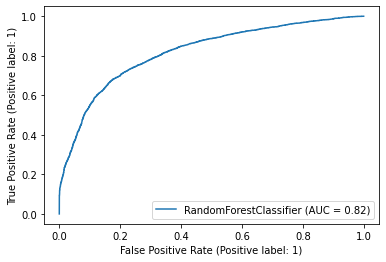

In [35]:
rf_classify=model_train(x_train,y_train,'Random Forest',RandomForestClassifier(n_estimators=100,max_depth=5),x_test,5,True,y_test)
met.plot_roc_curve(rf_classify,x_test,y_test)
print(list(zip(data.iloc[:,:-1].columns.tolist(),rf_classify.feature_importances_)))

In [42]:
data_feature_imp=pd.DataFrame(list(zip(data.iloc[:,:-1].columns.tolist(),rf_classify.feature_importances_)),columns=['Col_Name','Feature_importance'])
data_feature_imp.sort_values(by=['Feature_importance'],ascending=False)

,Col_Name,Feature_importance
6,PAY_2,0.196695
5,PAY_0,0.191032
3,MARRIAGE,0.078264
8,PAY_4,0.077171
7,PAY_3,0.071846
1,SEX,0.066585
10,PAY_6,0.051643
17,PAY_AMT1,0.039060
9,PAY_5,0.035579
0,LIMIT_BAL,0.033893


The above pandas dataframe shows the importance of each feature in determining credit card defaulters in best model trained (Random Forest Classifier) of given data